In [5]:
import pandas as pd

In [6]:
#Importar (cargar en memoria) los datos
#Pandas carga los datos como un dataframe o una matriz, tal como si tuvieramos una hoja de calculo
data = pd.read_csv('2titanic.csv')

In [7]:
#Previsualizar mis datos
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Cual es la dimension (renglones * columnas) de mi dataframe
data.shape

(891, 12)

In [9]:
#Ver cuantos elementos NO vacios tengo por cada columna
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [12]:
#Ver cuantos elementos nulos tengo por cada columna
col_names = data.columns.tolist()
for column in col_names:
    print("Valores nulos en " + str(column) + ": "+str(data[column].isnull().sum()))

Valores nulos en PassengerId: 0
Valores nulos en Survived: 0
Valores nulos en Pclass: 0
Valores nulos en Name: 0
Valores nulos en Sex: 0
Valores nulos en Age: 177
Valores nulos en SibSp: 0
Valores nulos en Parch: 0
Valores nulos en Ticket: 0
Valores nulos en Fare: 0
Valores nulos en Cabin: 687
Valores nulos en Embarked: 2


In [14]:
#Voy a transformar la columna "Sex" de male y female a M y F
d = {'male':'M', 'female':'F'}
data['Sex'] = data['Sex'].apply(lambda x:d[x])

In [15]:
#Visualizar transformación
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#Visualizar la edad de los tripulantes
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
#Visualizar la estadística descriptiva de mi dataset (solo las columnas númericas)
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#Visualizar cuántas personas se subieron pagando 0 chelines
data[data.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",M,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",M,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",M,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",M,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",M,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",M,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",M,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",M,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",M,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",M,NaN,0,0,112052,0.0,NaN,S


In [20]:
#Visualizar si hay alguna relación entre el sexo y la supervivencia
pd.crosstab(data.Survived, data.Sex)

Sex,F,M
Survived,,
0,81,468
1,233,109


In [22]:
#Visualizar como fue la supervivencia por clase, sexo
pclass_gender_survival_count_df = data.groupby( ['Pclass', 'Sex'] )['Survived'].sum()
pclass_gender_survival_count_df

Pclass  Sex
1       F      91
        M      45
2       F      70
        M      17
3       F      72
        M      47
Name: Survived, dtype: int64

In [28]:
import matplotlib.pyplot as plt

In [29]:
#Crear un canvas  o figura de 30x10 pixeles 
fig = plt.figure(figsize=(30,10))

<Figure size 2160x720 with 0 Axes>

Text(0.5, 1.0, 'Sobrevivieron - cuenta total')

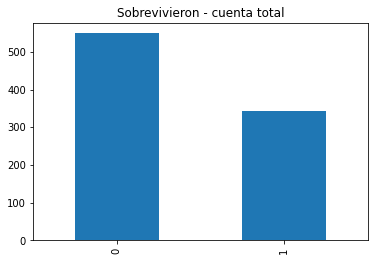

In [36]:
#Grafica de supervivencia
data.Survived.value_counts().plot(kind="bar", alpha=1)
plt.title('Sobrevivieron - cuenta total')

Text(0.5, 1.0, 'Sobrevivieron - porcentaje total -')

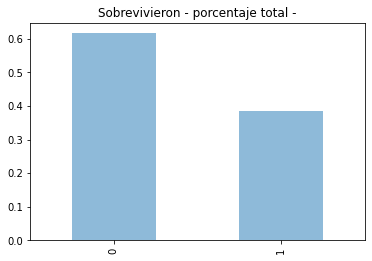

In [32]:
#Misma gráfica pero con porcentajes
data.Survived.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - porcentaje total -')

Text(0.5, 1.0, 'Sobrevivieron - porcentaje total -')

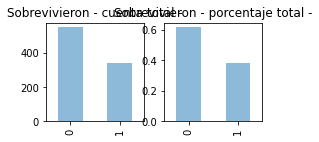

In [33]:
# queremos ver un plot al costado del otro, para esto pensemos en una grilla (celdas)
plt.subplot2grid((2,3),(0,0))
data.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - cuenta total -')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
plt.subplot2grid((2,3),(0,1))
data.Survived.value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivieron - porcentaje total -')

Text(0.5, 1.0, 'Sobrevivieron - Male vs Female -')

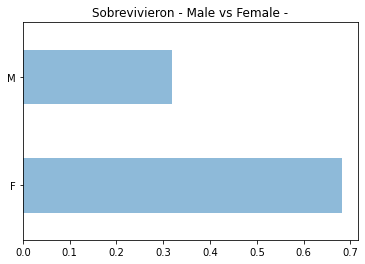

In [39]:
#Visualizar gráficamente si sobrevivieron más hombres que mujeres
data.Sex[data.Survived == 1].value_counts(normalize = True).plot(kind='barh', alpha=0.5)
plt.title('Sobrevivieron - Male vs Female -')

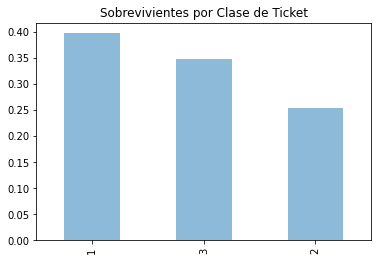

In [40]:
# La clase del ticket fue un factor de sobrevivencia
data.Pclass[data.Survived == 1 ].value_counts(normalize = True).plot(kind='bar', alpha=0.5)
plt.title('Sobrevivientes por Clase de Ticket')
plt.show()

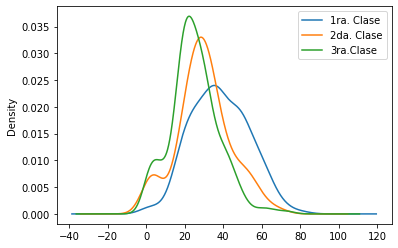

In [43]:
# Habra alguna relacion entre tipo de ticket y edad? (Poder Adquisitivo)
for t_class in [1,2,3]:
    data.Age[data.Pclass == t_class].plot(kind='kde')

plt.legend(("1ra. Clase", "2da. Clase", "3ra.Clase"))

In [44]:
#Visualizar cuantos pasajeros tenían menos de 1 año
data[data.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",M,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",M,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",F,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",F,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",M,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",M,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",M,0.83,1,1,29106,18.7500,NaN,S
